<a href="https://colab.research.google.com/github/GLOOMYY/RetoMeIA/blob/main/RetoMeia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Reto de MEIA

- Intregantes:
Nicolás Alonso Suárez Rodríguez





Instalación de librerias
- Pandas
- Tensorflow


Cargue de datos

In [ ]:
import os
import json

## Variables
# Obtener la ruta (path) completa de los archivos
train_file = os.path.join('/content/drive/MyDrive/MeIA/Reto/delitos_train.json')
test_file = os.path.join('/content/drive/MyDrive/MeIA/Reto/delitos_test.json')


try:
    import pandas as pd
    import tensorflow
except:
    !pip install pandas
    !pip install tensorflow

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar datos de entrenamiento
with open(train_file, 'r') as f:
    train_data = [json.loads(line) for line in f]

# Cargar datos de prueba
with open(test_file, 'r') as f:
    test_data = [json.loads(line) for line in f]

# Crear un DataFrame para los datos de entrenamiento
train_df = pd.DataFrame(train_data)

# Crear un DataFrame para los datos de prueba
test_df = pd.DataFrame(test_data)

# Imprimir la descripción de los datos de entrenamiento
print("Datos de entrenamiento:")
print(train_df.describe())

# Imprimir la descripción de los datos de prueba
print("Datos de prueba:")
print(test_df.describe())


Datos de entrenamiento:
                 id        klass
count  1.440000e+03  1440.000000
mean   1.116548e+18     0.259028
std    1.988537e+17     0.438253
min    6.911241e+17     0.000000
25%    9.562856e+17     0.000000
50%    1.121323e+18     0.000000
75%    1.255905e+18     1.000000
max    1.541451e+18     1.000000
Datos de prueba:
                 id       klass
count  3.600000e+02  360.000000
mean   1.108423e+18    0.211111
std    1.881880e+17    0.408665
min    6.911266e+17    0.000000
25%    9.562924e+17    0.000000
50%    1.108663e+18    0.000000
75%    1.226775e+18    0.000000
max    1.541449e+18    1.000000


In [ ]:
# Imprimir head para verificar el contenido
print(train_df.head())
# Imprimir head para verificar el contenido
print(test_df.head())

  annotations                   id  klass  \
0   [0, 0, 0]  1463228370364289031      0   
1   [0, 0, 0]  1226765292862365696      0   
2   [0, 0, 0]   781360222493376513      0   
3   [0, 0, 0]  1175489633452322816      0   
4   [0, 0, 0]   933042526436626434      0   

                                                text  
0  @mauroaboga1 Este caso tiene mucho que ver con...  
1  Eln habría amenazado un “paro armado” en toda ...  
2                          @Beatlosmar, dame jugo:g.  
3  @Lishedsoto En la plazita donde tomas el colec...  
4  @RafaMorenoValle el Frente debe de tener un ca...  
  annotations                   id  klass  \
0   [0, 0, 0]  1154838936834981895      0   
1   [0, 0, 0]   931661703485558785      0   
2   [0, 0, 0]  1106960204078428161      0   
3   [0, 0, 0]  1171786235544604672      0   
4   [0, 0, 0]  1347926982512803841      0   

                                                text  
0  Los 5 videos virales más vistos de la semana h...  
1  #Reddenoticias:

In [ ]:
# Separar los datos de entrenamiento en tweets y etiquetas
train_tweets = train_df['id'].tolist()
train_labels = train_df['klass'].tolist()
train_texts = train_df['text'].tolist()

# Separar los datos de prueba en tweets y etiquetas
test_tweets = test_df['id'].tolist()
test_labels = test_df['klass'].tolist()
test_texts = test_df['text'].tolist()

In [ ]:
# Mostrar tweets y labels de los datos para ver corroborar, solo 10 primeras posiciones
print(train_labels[:10], end="\n____________________________ \n")
print(train_tweets[:10], end="\n____________________________ \n")
print(train_texts)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
____________________________ 
[1463228370364289031, 1226765292862365696, 781360222493376513, 1175489633452322816, 933042526436626434, 762631480644366336, 1315242496625123335, 956285486586322945, 1040879981012942849, 1255879198461366278]
____________________________ 
['@mauroaboga1 Este caso tiene mucho que ver con lo que paso en EEUU, Kenosha —Kyle Rittenhouse, el notorio adolescente blanco armado acusado de asesinar a dos personas e intentar matar a una tercera durante una protesta por la violencia policial en agosto pasado, fue declarado inocente.', 'Eln habría amenazado un “paro armado” en toda\xa0Colombia https://t.co/PbFDU39DTu https://t.co/85kzotPxmY', '@Beatlosmar, dame jugo:g.', '@Lishedsoto En la plazita donde tomas el colectivo para Tulum se pone un puesto en las mañanas en la siguiete esquina', '@RafaMorenoValle el Frente debe de tener un candidato competitivo, eso lo garantiza un método abierto y democrático, porque si no puedes ganar una inte

In [ ]:
# Mostrar tweets y labels de los datos para ver corroborar, solo 10 primeras posiciones
print(test_labels[:10], end="\n____________________________ \n")
print(test_tweets[:10], end="\n____________________________ \n")
print(test_texts)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
____________________________ 
[1154838936834981895, 931661703485558785, 1106960204078428161, 1171786235544604672, 1347926982512803841, 1106904743119601664, 754353916788125697, 1106933977519132672, 1195875418374627328, 1175487803372838913]
____________________________ 
['Los 5 videos virales más vistos de la semana https://t.co/a6YmNhAnIH', '#Reddenoticias: Suman 20 las provincias en alerta por las lluvias alerta en carretera por derrumbes- chorizo @JeanSuriel #NCDN https://t.co/EpS6iDKQ9n', '...por si quieren seguir viendo retratos de un funcionario que no trabaja porque sólo espera que su jefe le diga qué hacer... a darle likes a su ego mientras la ciudad sigue vuelta mierda, pues... 👇🏻', 'El jefe de la Policía Federal relató cómo fue el ataque https://t.co/sKVx4HgDNT https://t.co/lJ90T1Isv7', '#NevadaEspaña🏔️❄️|  Dos muertos por el temporal de nieve en España; el Ejército interviene para rescatar conductores atrapados https://t.co/bl9uUgqYrs \n\n📸: AFP 

Limpieza de datos

In [ ]:
import re

def limpiar_tweet(tweet):
    # Eliminar URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Eliminar menciones
    tweet = re.sub(r'@\w+', '', tweet)

    # Eliminar caracteres especiales y puntuación
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Convertir a minúsculas
    tweet = tweet.lower()

    return tweet

# Ejemplo de limpieza de tweets de entrenamiento
train_tweets_limpios = []
for tweet in train_texts:
    if isinstance(tweet, str):
        train_tweets_limpios.append(limpiar_tweet(tweet))

# Ejemplo de limpieza de tweets de prueba
test_tweets_limpios = []
for tweet in test_texts:
    if isinstance(tweet, str):
        test_tweets_limpios.append(limpiar_tweet(tweet))


In [ ]:
print(train_tweets_limpios[:10])
print(test_tweets_limpios[:10])

[' este caso tiene mucho que ver con lo que paso en eeuu kenosha kyle rittenhouse el notorio adolescente blanco armado acusado de asesinar a dos personas e intentar matar a una tercera durante una protesta por la violencia policial en agosto pasado fue declarado inocente', 'eln habría amenazado un paro armado en toda\xa0colombia  ', ' dame jugog', ' en la plazita donde tomas el colectivo para tulum se pone un puesto en las mañanas en la siguiete esquina', ' el frente debe de tener un candidato competitivo eso lo garantiza un método abierto y democrático porque si no puedes ganar una interna menos una constitucional edoméxvaconrafa ', '  frutillar vía con micros y taxis q circulan a alta velocidad el cruce no tiene ninguna regulación zona residencial', 'drama peleas a golpes romance y ansiedad la vida secreta de beverly hills\xa090210 ', 'un individuo ha sido detenido en huajuapan como presunto responsable del abuso sexual de su propia hija los hechos ocurrieron en vísperas de navidad d

In [ ]:
print(len(train_tweets_limpios))
print(len(test_tweets_limpios))

1440
360


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Descargar recursos necesarios para la tokenización
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Ejemplo de tokenización de tweets de entrenamiento
train_tokens = [word_tokenize(tweet) for tweet in train_tweets_limpios]

# Ejemplo de tokenización de tweets de prueba
test_tokens = [word_tokenize(tweet) for tweet in test_tweets_limpios]

In [ ]:
print(train_tokens[:10])
print(test_tokens[:10])

print(len(train_tokens))
print(len(test_tokens))

[['este', 'caso', 'tiene', 'mucho', 'que', 'ver', 'con', 'lo', 'que', 'paso', 'en', 'eeuu', 'kenosha', 'kyle', 'rittenhouse', 'el', 'notorio', 'adolescente', 'blanco', 'armado', 'acusado', 'de', 'asesinar', 'a', 'dos', 'personas', 'e', 'intentar', 'matar', 'a', 'una', 'tercera', 'durante', 'una', 'protesta', 'por', 'la', 'violencia', 'policial', 'en', 'agosto', 'pasado', 'fue', 'declarado', 'inocente'], ['eln', 'habría', 'amenazado', 'un', 'paro', 'armado', 'en', 'toda', 'colombia'], ['dame', 'jugog'], ['en', 'la', 'plazita', 'donde', 'tomas', 'el', 'colectivo', 'para', 'tulum', 'se', 'pone', 'un', 'puesto', 'en', 'las', 'mañanas', 'en', 'la', 'siguiete', 'esquina'], ['el', 'frente', 'debe', 'de', 'tener', 'un', 'candidato', 'competitivo', 'eso', 'lo', 'garantiza', 'un', 'método', 'abierto', 'y', 'democrático', 'porque', 'si', 'no', 'puedes', 'ganar', 'una', 'interna', 'menos', 'una', 'constitucional', 'edoméxvaconrafa'], ['frutillar', 'vía', 'con', 'micros', 'y', 'taxis', 'q', 'circul

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convertir etiquetas de entrenamiento en codificación numérica
encoder = LabelEncoder()
train_labels_encoded = encoder.fit_transform(train_labels)

# Convertir etiquetas de prueba en codificación numérica
test_labels_encoded = encoder.transform(test_labels)


In [ ]:
## Imprimir para verificcar que estan toidos los datos
print(train_labels_encoded[:10])
print(test_labels_encoded[:10])
## Imprimir para verificcar que estan todos los datos
print(len(train_labels_encoded))
print(len(test_labels_encoded))

[0 0 0 0 0 0 0 1 1 0]
[0 0 0 0 0 0 0 0 0 0]
1440
360


In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=150, min_count=1)

# Crear vectores de tweets promediando los vectores de palabras
def tweet_to_vector(tweet):
    vectors = []
    for word in tweet:
        if word in word2vec_model.wv:
            vectors.append(word2vec_model.wv[word])
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(150)  # Rellenar con ceros si no hay palabras válidas en el tweet

# Obtener vectores de tweets de entrenamiento
train_vectors = [tweet_to_vector(tweet) for tweet in train_tokens]

# Obtener vectores de tweets de prueba
test_vectors = [tweet_to_vector(tweet) for tweet in test_tokens]


In [ ]:
print(len(train_vectors))
print(len(test_vectors))

print(train_vectors[:1])

1440
360
[array([ 0.07602111, -0.03046899, -0.01511992,  0.01685361, -0.0383481 ,
       -0.08199691,  0.06162496,  0.17259969, -0.02596148,  0.07004803,
        0.0923069 , -0.16200724, -0.12473511,  0.24930511, -0.150206  ,
        0.00361564,  0.16450217,  0.00441799, -0.02630374,  0.0740751 ,
       -0.08592352, -0.01175375,  0.15287764,  0.11863019,  0.03872717,
        0.065456  , -0.13500616,  0.03221579,  0.00486407, -0.28961226,
       -0.08962169,  0.00395262,  0.0099082 , -0.13173953, -0.13214152,
       -0.03972382,  0.27615905, -0.01753319,  0.02220713, -0.1335321 ,
        0.00807888,  0.01817551, -0.10807504, -0.10954934, -0.00237117,
       -0.0439355 , -0.04015311, -0.05033598, -0.02641254,  0.15022738,
       -0.11382052,  0.08715773, -0.20825428, -0.01395619,  0.11430196,
       -0.03994331,  0.1599388 ,  0.04896357, -0.01160732,  0.03399229,
       -0.11453515, -0.12258661,  0.02065041, -0.08229879,  0.10678635,
       -0.10533445, -0.07903225, -0.17007329, -0.31577

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, GlobalMaxPooling1D, Dropout, Bidirectional

# Definir la arquitectura del modelo
model = Sequential()

# Definir los valores de vocab_size, embedding_dim y max_length
vocab_size = 10000  # Tamaño del vocabulario
embedding_dim = 150  # Dimensión de los vectores de palabras
max_length = 150  # Longitud máxima de los tweets
epochs = 10
batch_size = 32

# Capa de procesamiento de texto (embedding)
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))


model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(embedding_dim)))

model.add(Dropout(0.2))
# Capa recurrente (LSTM)

model.add(Dense(3, activation='softmax'))

model.add(Dropout(0.2))

# Capa de salida
model.add(Dense(units=1, activation='sigmoid'))

model.add(Dropout(0.2))
# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 150)          1500000   
                                                                 
 dropout_11 (Dropout)        (None, 150, 150)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 300)              361200    
 nal)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 300)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 903       
                                                                 
 dropout_13 (Dropout)        (None, 3)                 0         
                                                     

In [ ]:
import numpy as np

# Convertir los datos de entrada a matrices NumPy
train_vectors = np.array(train_vectors)
train_labels = np.array(train_labels)
test_vectors = np.array(test_vectors)
test_labels = np.array(test_labels)

# Truncar o recortar los vectores de entrada
train_vectors = train_vectors[:, :max_length]
test_vectors = test_vectors[:, :max_length]

# Entrenamiento del modelo
modelito = model.fit(train_vectors, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_vectors, test_labels))



Epoch 1/10
45/45 [==============================] - 37s 753ms/step - loss: 1.2701 - accuracy: 0.6833 - val_loss: 0.5210 - val_accuracy: 0.7889
Epoch 2/10
45/45 [==============================] - 37s 819ms/step - loss: 1.1617 - accuracy: 0.6667 - val_loss: 0.5198 - val_accuracy: 0.7889
Epoch 3/10
45/45 [==============================] - 32s 722ms/step - loss: 1.2746 - accuracy: 0.6444 - val_loss: 0.5194 - val_accuracy: 0.7889
Epoch 4/10
45/45 [==============================] - 33s 733ms/step - loss: 1.2742 - accuracy: 0.6708 - val_loss: 0.5185 - val_accuracy: 0.7889
Epoch 5/10
45/45 [==============================] - 33s 731ms/step - loss: 1.2639 - accuracy: 0.6729 - val_loss: 0.5342 - val_accuracy: 0.7889
Epoch 6/10
45/45 [==============================] - 35s 776ms/step - loss: 1.4138 - accuracy: 0.6569 - val_loss: 0.5229 - val_accuracy: 0.7889
Epoch 7/10
45/45 [==============================] - 33s 727ms/step - loss: 1.1779 - accuracy: 0.6653 - val_loss: 0.5269 - val_accuracy: 0.7889

In [ ]:

# Acceder a las métricas
train_loss = modelito.history['loss']
train_accuracy = modelito.history['accuracy']
val_loss = modelito.history['val_loss']
val_accuracy = modelito.history['val_accuracy']


In [ ]:
print(train_loss)
print(train_accuracy)
print(val_loss)
print(val_accuracy)

[1.270103096961975, 1.1617203950881958, 1.2746483087539673, 1.2742061614990234, 1.2638633251190186, 1.4138379096984863, 1.1779032945632935, 1.2891770601272583, 1.29269540309906, 1.3188070058822632]
[0.6833333373069763, 0.6666666865348816, 0.644444465637207, 0.6708333492279053, 0.6729166507720947, 0.6569444537162781, 0.6652777791023254, 0.6798611283302307, 0.6777777671813965, 0.7166666388511658]
[0.5210453271865845, 0.5198425054550171, 0.5193868279457092, 0.5185272097587585, 0.5342466831207275, 0.5228769779205322, 0.5269423127174377, 0.5181645154953003, 0.5186445116996765, 0.5195339918136597]
[0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693, 0.7888888716697693]


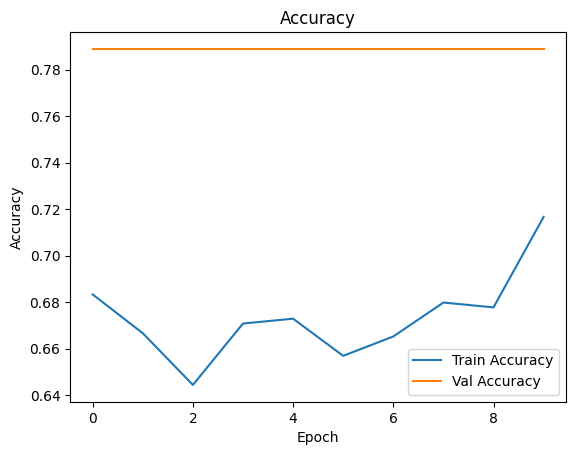

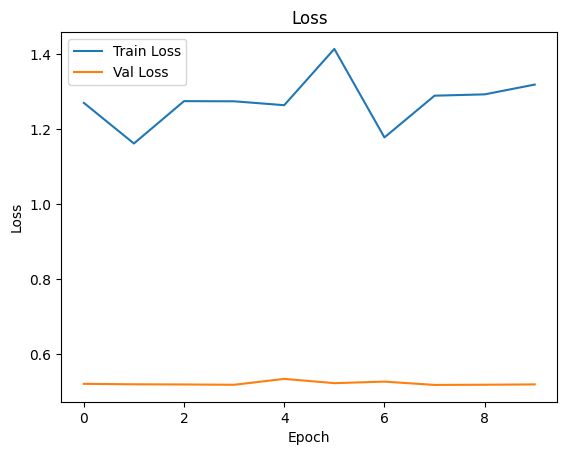

In [ ]:
import matplotlib.pyplot as plt

# Plot de la precisión
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot de la pérdida
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
txt = ['''
Que día para aprender sobre inteligencia artificial, es un lindo dia
''']

vocab_size = 10000
embedding_dim = 64
max_length = 150
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok, lower=True)
tokenizer.fit_on_texts(train_tokens)
word_index = tokenizer.word_index
dict(list(word_index.items())[:10])

seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print(pred)

posiblesSalidas = dict();
posiblesSalidas[1] = "Parece un texto con Delito 1"
posiblesSalidas[0] = "Parece un texto sin Delito 0"

print(posiblesSalidas[np.argmax(pred)]);

1/1 [==============================] - 1s 842ms/step
[[0.24937859]]
Parece un texto sin Delito 0


In [ ]:

loss, accuracy = model.evaluate(test_vectors, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)

12/12 [==============================] - 2s 174ms/step - loss: 0.5195 - accuracy: 0.7889
Loss: 0.5195339918136597
Accuracy: 0.7888888716697693
